# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#URL called to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"

#Variables
temps = []
unit = "imperial"
coordinates = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Loop through to collect temperature for each city in the cities list
for city in cities:
    #Build query URL and request your results in Fahrenheit
    query_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    #Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        temperature = weather_json["main"]["temp"]
        temps.append(temperature)
        coordinates.append(weather_json["coord"])
        lat = weather_json["coord"]["lat"]
        latitude.append(lat)
        lon = weather_json["coord"]["lon"]
        longitude.append(lat)
        humidity_level = weather_json["main"]["humidity"]
        humidity.append(humidity_level)
        clouds = weather_json["clouds"]["all"]
        cloudiness.append(clouds)
        wind = weather_json["wind"]["speed"]
        wind_speed.append(wind)
        cntry = weather_json["sys"]["country"]
        country.append(cntry)
        date.append(weather_json["dt"])
        #https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/
        print(f"City {cities.index(city)}: the temperature in {city} is {round(temperature)}" + " degrees Fahrenheit")
    except:
        coordinates.append(0)
        temps.append(0)
        humidity.append(0)
        cloudiness.append(0)
        wind_speed.append(0)
        latitude.append(0)
        longitude.append(0)
        country.append(0)
        date.append(0)
        print(f"{city} not found. Skipping...")

City 0: the temperature in santa marta is 90 degrees Fahrenheit
City 1: the temperature in rikitea is 72 degrees Fahrenheit
kuche not found. Skipping...
City 3: the temperature in cidreira is 65 degrees Fahrenheit
City 4: the temperature in husavik is 54 degrees Fahrenheit
illoqqortoormiut not found. Skipping...
City 6: the temperature in new norfolk is 34 degrees Fahrenheit
City 7: the temperature in puerto escondido is 79 degrees Fahrenheit
City 8: the temperature in buchmany is 72 degrees Fahrenheit
City 9: the temperature in constitucion is 53 degrees Fahrenheit
City 10: the temperature in puerto ayora is 70 degrees Fahrenheit
City 11: the temperature in raudeberg is 50 degrees Fahrenheit
City 12: the temperature in roma is 80 degrees Fahrenheit
City 13: the temperature in ushuaia is 34 degrees Fahrenheit
taolanaro not found. Skipping...
City 15: the temperature in punta arenas is 39 degrees Fahrenheit
City 16: the temperature in east london is 59 degrees Fahrenheit
City 17: the te

City 137: the temperature in nikolsk is 63 degrees Fahrenheit
City 138: the temperature in mar del plata is 64 degrees Fahrenheit
City 139: the temperature in sola is 81 degrees Fahrenheit
City 140: the temperature in ituango is 76 degrees Fahrenheit
City 141: the temperature in noumea is 68 degrees Fahrenheit
City 142: the temperature in wloclawek is 71 degrees Fahrenheit
City 143: the temperature in dali is 66 degrees Fahrenheit
City 144: the temperature in hami is 85 degrees Fahrenheit
City 145: the temperature in nadym is 52 degrees Fahrenheit
City 146: the temperature in nakhon nayok is 87 degrees Fahrenheit
City 147: the temperature in port alfred is 62 degrees Fahrenheit
lolua not found. Skipping...
City 149: the temperature in bystrzyca klodzka is 70 degrees Fahrenheit
karkaralinsk not found. Skipping...
tidore not found. Skipping...
City 152: the temperature in deputatskiy is 27 degrees Fahrenheit
City 153: the temperature in norman wells is 52 degrees Fahrenheit
City 154: the

City 275: the temperature in richmond is 81 degrees Fahrenheit
City 276: the temperature in uyutne is 77 degrees Fahrenheit
City 277: the temperature in esperance is 48 degrees Fahrenheit
grand centre not found. Skipping...
City 279: the temperature in bilma is 98 degrees Fahrenheit
City 280: the temperature in ornskoldsvik is 59 degrees Fahrenheit
City 281: the temperature in synya is 56 degrees Fahrenheit
City 282: the temperature in ghanzi is 76 degrees Fahrenheit
City 283: the temperature in soyo is 79 degrees Fahrenheit
City 284: the temperature in mantua is 82 degrees Fahrenheit
City 285: the temperature in yulara is 64 degrees Fahrenheit
City 286: the temperature in daru is 76 degrees Fahrenheit
louisbourg not found. Skipping...
City 288: the temperature in tabas is 99 degrees Fahrenheit
City 289: the temperature in tilichiki is 40 degrees Fahrenheit
City 290: the temperature in srednekolymsk is 37 degrees Fahrenheit
City 291: the temperature in lata is 89 degrees Fahrenheit
Cit

City 411: the temperature in sheltozero is 65 degrees Fahrenheit
City 412: the temperature in moose factory is 55 degrees Fahrenheit
City 413: the temperature in san quintin is 75 degrees Fahrenheit
City 414: the temperature in leningradskiy is 42 degrees Fahrenheit
City 415: the temperature in bayan is 68 degrees Fahrenheit
City 416: the temperature in hopatcong is 83 degrees Fahrenheit
City 417: the temperature in san ramon is 72 degrees Fahrenheit
City 418: the temperature in mozarlandia is 98 degrees Fahrenheit
City 419: the temperature in rauma is 57 degrees Fahrenheit
City 420: the temperature in ust-maya is 43 degrees Fahrenheit
yeletskiy not found. Skipping...
City 422: the temperature in sibolga is 78 degrees Fahrenheit
City 423: the temperature in riberalta is 82 degrees Fahrenheit
City 424: the temperature in rolante is 71 degrees Fahrenheit
City 425: the temperature in dingle is 78 degrees Fahrenheit
City 426: the temperature in darhan is 58 degrees Fahrenheit
City 427: the

andevoranto not found. Skipping...
City 547: the temperature in santa cruz de la palma is 81 degrees Fahrenheit
iordacheanu not found. Skipping...
City 549: the temperature in bud is 82 degrees Fahrenheit
City 550: the temperature in yinchuan is 76 degrees Fahrenheit
City 551: the temperature in port hardy is 57 degrees Fahrenheit
samalaeulu not found. Skipping...
City 553: the temperature in kargasok is 50 degrees Fahrenheit
City 554: the temperature in xichang is 62 degrees Fahrenheit
City 555: the temperature in mildura is 42 degrees Fahrenheit
City 556: the temperature in ithaca is 83 degrees Fahrenheit
City 557: the temperature in morondava is 74 degrees Fahrenheit
City 558: the temperature in codajas is 99 degrees Fahrenheit
City 559: the temperature in padang is 79 degrees Fahrenheit
City 560: the temperature in cervo is 79 degrees Fahrenheit
City 561: the temperature in siocon is 80 degrees Fahrenheit
City 562: the temperature in istanbul is 81 degrees Fahrenheit
City 563: the 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dataframe
weather_dict = { 
    "City": cities,
    "Coordinates": coordinates,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temps,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}

weather_data = pd.DataFrame(weather_dict)
cleaned_weather_data = weather_data.loc[weather_data["Temperature"] > 0 , :]
cleaned_weather_data = cleaned_weather_data.reset_index(drop=True)
# https://stackoverflow.com/questions/62887543/remove-curly-brace-in-field
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].astype('str')
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.strip("{'lon': ")
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.strip("}")
# https://www.programiz.com/python-programming/methods/string/replace
cleaned_weather_data["Coordinates"] = cleaned_weather_data["Coordinates"].str.replace("'lat':", " ")

In [6]:
#Write to .csv
cleaned_weather_data.to_csv('city_weather.csv')

In [7]:
cleaned_weather_data.head(5)

,City,Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa marta,"-74.2, 11.24",11.24,11.24,89.60,75,40,6.93,CO,1598284327
1,rikitea,"-134.97, -23.12",-23.12,-23.12,72.03,85,0,18.34,PF,1598284584
2,cidreira,"-50.21, -30.18",-30.18,-30.18,64.80,66,0,17.38,BR,1598284584
3,husavik,"-17.34, 66.04",66.04,66.04,53.60,66,20,4.70,IS,1598284584
4,new norfolk,"147.06, -42.78",-42.78,-42.78,34.45,93,40,4.70,AU,1598284585


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_a_hundred = cleaned_weather_data.loc[cleaned_weather_data["Humidity"] > 100 , :]
humidity_over_a_hundred.head(5)

,City,Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
#SKIPPING AS NO CITY HAS OVER 100% HUMIDITY

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#SKIPPING AS NO CITY HAS OVER 100% HUMIDITY

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

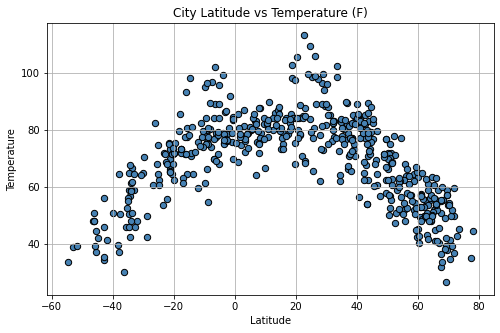

In [13]:
x_lat = cleaned_weather_data["Latitude"]
y_temp = cleaned_weather_data["Temperature"]

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html?highlight=marker%20size
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Temperature", title = "City Latitude vs Temperature (F)", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.show()

## Latitude vs. Humidity Plot

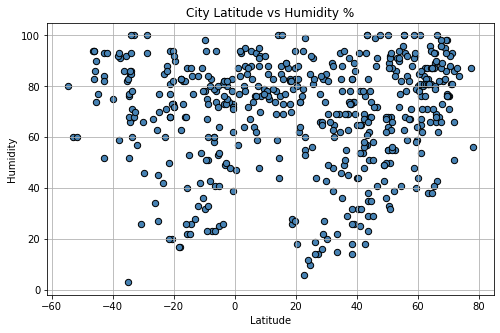

In [15]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "City Latitude vs Humidity %", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.show()

## Latitude vs. Cloudiness Plot

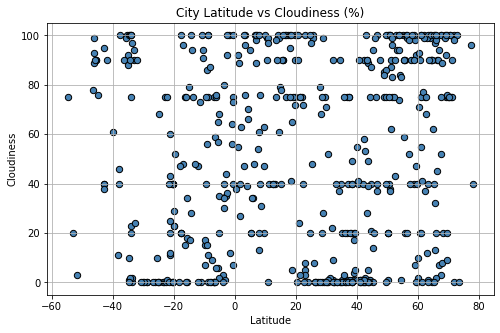

In [16]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "City Latitude vs Cloudiness (%)", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.show()

## Latitude vs. Wind Speed Plot

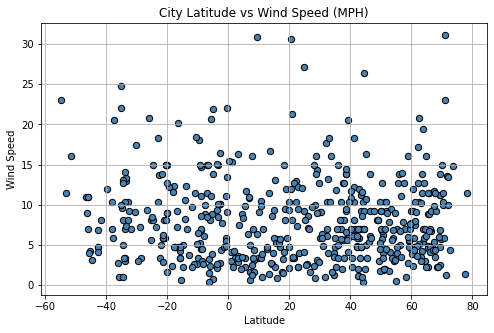

In [17]:
cleaned_weather_data.plot(kind = "scatter", x = "Latitude", y = "Wind Speed", title = "City Latitude vs Wind Speed (MPH)", 
                         color = "steelblue", edgecolors = "black", s = 40, figsize = (8,5), grid = True)
plt.show()

## Linear Regression

In [18]:
#Northern hemisphere variables
northern_hemisphere = cleaned_weather_data.loc[cleaned_weather_data["Latitude"] >= 0 , :]
northern_hem_lat = northern_hemisphere["Latitude"]
northern_temp = northern_hemisphere["Temperature"]

#Southern hemisphere variables
southern_hemisphere = cleaned_weather_data.loc[cleaned_weather_data["Latitude"] < 0 , :]
southern_hem_lat = southern_hemisphere["Latitude"]
southern_temp = southern_hemisphere["Temperature"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

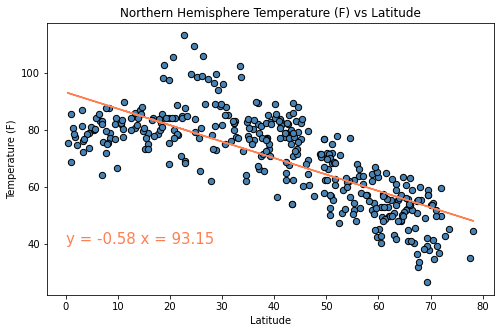

The r-value is -0.75


In [26]:
#Get pearson r value AKA correlation number
northern_rvalue = st.pearsonr(northern_hem_lat, northern_temp)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_temp)

northern_fit = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_temp, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit, color = "coral")
plt.annotate(line_eq, (0, 40), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere Temperature (F) vs Latitude")
plt.show()
print(f"The r-value is {northern_rvalue[0]:.2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

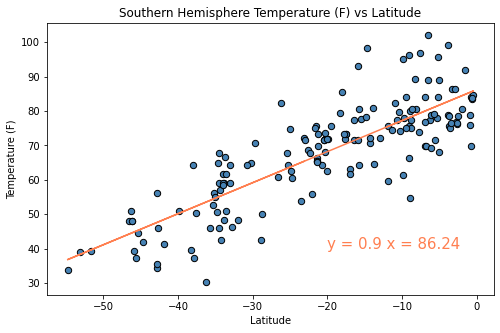

The r-value is 0.83


In [27]:
#Get pearson r value AKA correlation number
southern_rvalue = st.pearsonr(southern_hem_lat, southern_temp)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_temp)

southern_fit = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_temp, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit, color = "coral")
plt.annotate(line_eq, (-20, 40), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere Temperature (F) vs Latitude")
plt.show()
print(f"The r-value is {southern_rvalue[0]:.2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

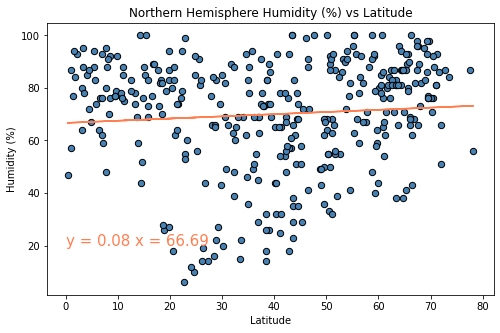

The r-value is 0.08


In [28]:
northern_humidity = northern_hemisphere["Humidity"]

#Get pearson r value AKA correlation number
northern_hum_rvalue = st.pearsonr(northern_hem_lat, northern_humidity)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_humidity)

northern_fit_hum = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_humidity, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_hum, color = "coral")
plt.annotate(line_eq, (0, 20), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity (%) vs Latitude")
plt.show()
print(f"The r-value is {northern_hum_rvalue[0]:.2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

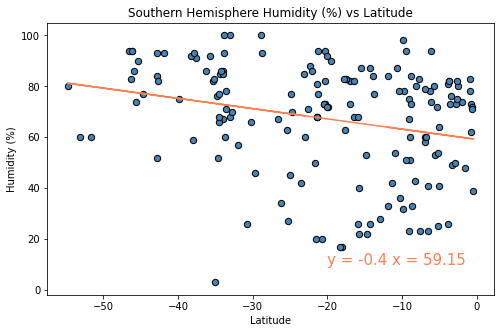

The r-value is -0.25


In [29]:
southern_humidity = southern_hemisphere["Humidity"]

#Get pearson r value AKA correlation number
southern_hum_rvalue = st.pearsonr(southern_hem_lat, southern_humidity)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_humidity)

southern_fit_hum = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_humidity, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_hum, color = "coral")
plt.annotate(line_eq, (-20, 10), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity (%) vs Latitude")
plt.show()
print(f"The r-value is {southern_hum_rvalue[0]:.2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

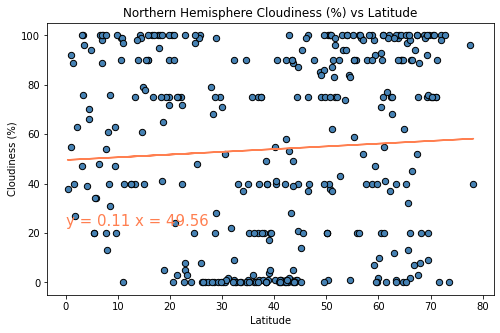

The r-value is 0.059


In [30]:
northern_cloudiness = northern_hemisphere["Cloudiness"]

#Get pearson r value AKA correlation number
northern_cloud_rvalue = st.pearsonr(northern_hem_lat, northern_cloudiness)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_cloudiness)

northern_fit_cloud = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_cloudiness, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_cloud, color = "coral")
plt.annotate(line_eq, (0, 23), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude")
plt.show()
print(f"The r-value is {northern_cloud_rvalue[0]:.2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

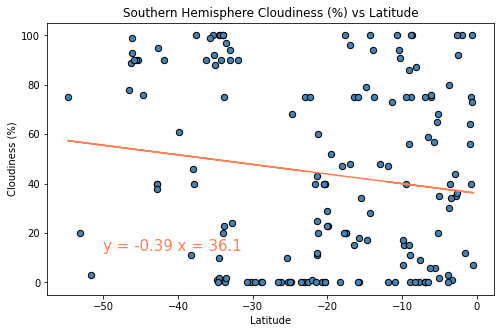

The r-value is -0.15


In [31]:
southern_cloudiness = southern_hemisphere["Cloudiness"]

#Get pearson r value AKA correlation number
southern_cloud_rvalue = st.pearsonr(southern_hem_lat, southern_cloudiness)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_cloudiness)

southern_fit_cloud = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_cloudiness, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_cloud, color = "coral")
plt.annotate(line_eq, (-50, 13), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness (%) vs Latitude")
plt.show()
print(f"The r-value is {southern_cloud_rvalue[0]:.2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

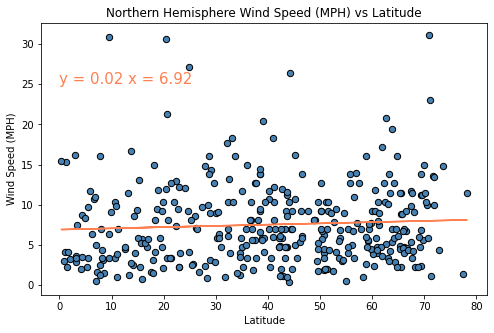

The r-value is 0.062


In [32]:
northern_wind = northern_hemisphere["Wind Speed"]

#Get pearson r value AKA correlation number
northern_wind_rvalue = st.pearsonr(northern_hem_lat, northern_wind)

northern_slope, northern_int, northern_r, northern_p, northern_std_err = st.linregress(northern_hem_lat, northern_wind)

northern_fit_wind = northern_slope * northern_hem_lat + northern_int
line_eq = "y = " + str(round(northern_slope,2)) + " x = " + str(round(northern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(northern_hem_lat, northern_wind, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(northern_hem_lat, northern_fit_wind, color = "coral")
plt.annotate(line_eq, (0, 25), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Northern Hemisphere Wind Speed (MPH) vs Latitude")
plt.show()
print(f"The r-value is {northern_wind_rvalue[0]:.2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

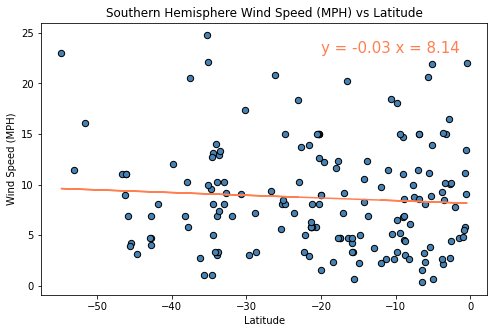

The r-value is -0.07


In [33]:
southern_wind = southern_hemisphere["Wind Speed"]

#Get pearson r value AKA correlation number
southern_wind_rvalue = st.pearsonr(southern_hem_lat, southern_wind)

southern_slope, southern_int, southern_r, southern_p, southern_std_err = st.linregress(southern_hem_lat, southern_wind)

southern_fit_wind = southern_slope * southern_hem_lat + southern_int
line_eq = "y = " + str(round(southern_slope,2)) + " x = " + str(round(southern_int,2))

plt.figure(figsize = (8, 5))
plt.scatter(southern_hem_lat, southern_wind, s = 40, edgecolor = "black", color = "steelblue")
plt.plot(southern_hem_lat, southern_fit_wind, color = "coral")
plt.annotate(line_eq, (-20, 23), fontsize = 15, color = "coral")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Southern Hemisphere Wind Speed (MPH) vs Latitude")
plt.show()
print(f"The r-value is {southern_wind_rvalue[0]:.2}")